# Super Market Sales - Exploratory Ananlysis - EDA

> About Project - By using this Data set I want to know about the 3 months of all braches' transactions have done And Explore every transaction between each individual category columns and numerical columns.
And How Gender.

> How The sales are influenced gender-wise, City, Products, Customer Type.

>Each Branch wise sales Behavior.




## Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/master/supermarket_sales%20-%20Sheet1.csv')

In [3]:
df.head() #exploring the number of columns of data set.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info() #here we can get no.of rowss(entries) ,columns and dtype of each columns to further process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.duplicated().sum() #checking about the duplicates

0

In [6]:
df.isnull().sum() # checking the null values and sum it each column to know the count of null value

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Data Cleaning (Data Wrangling)

1. Removing the Unnecessary columns which are not required for my analysis.

2. Converting the data type, default to meaningful.

In [7]:
#Note -   i am removing the gp% because, if you check df(data frame) gp% has same observations so that...
#        and also tax column is not required for my analysis.


df.drop(columns=['Tax 5%','gross margin percentage'],axis=1,inplace=True) 

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Time'] = pd.to_datetime(df['Time']) #coverting object to data time formate

In [10]:
df['Time'] = df.Time.dt.hour #keeping the column as a hour observations. 

## Statistics Summary

#### Statistics summary gives a high-level idea to identify whether the data has any Outliers, Data entry  error, 
#### Distribution of data such as the data is normally distributed or left / right skewed.

In [11]:
df.describe()

,Unit price,Quantity,Total,Time,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,14.910000,307.58738,15.379369,6.97270
std,26.494628,2.923431,245.885335,3.186857,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.000000,10.17000,0.508500,4.00000
25%,32.875000,3.000000,124.422375,12.000000,118.49750,5.924875,5.50000
50%,55.230000,5.000000,253.848000,15.000000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,471.350250,18.000000,448.90500,22.445250,8.50000
max,99.960000,10.000000,1042.650000,20.000000,993.00000,49.650000,10.00000


### From the statistics summary, we can infer the below findings :

. we can observe here, the data set does not have much outliers and skewsness.
above columns are all float or integer dtype. so see every column mean and standard deviation.
looks preety normal.

. Rating from users is 7 from median and 6.97 from mean. looks decent rating.

. Here we can see the margin between total and cogs. with  ".describe()"  function we could check difference between them
easily.

#### Before we do EDA, lets seperate Numerical and Categorical variables for easy analysis

In [12]:
Quantitative_data = df.select_dtypes(include=np.number).columns.tolist()

In [13]:
Quantitative_data

['Unit price', 'Quantity', 'Total', 'Time', 'cogs', 'gross income', 'Rating']

In [14]:
Qualitative_data = df.select_dtypes(include=['object']).columns

In [15]:
Qualitative_data

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Payment'],
      dtype='object')

## EDA  Univariate Analysis

Unit price
 
Skewness : 0.007077447853328846


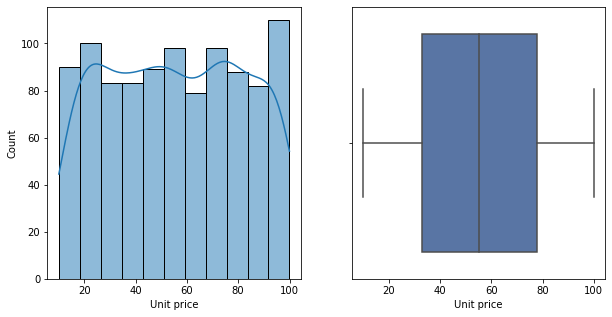

Quantity
 
Skewness : 0.012941048017172435


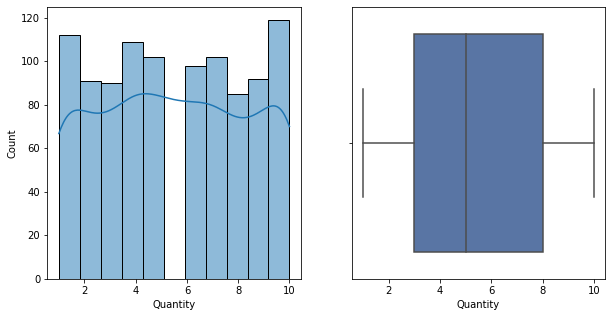

Total
 
Skewness : 0.8925698049581418


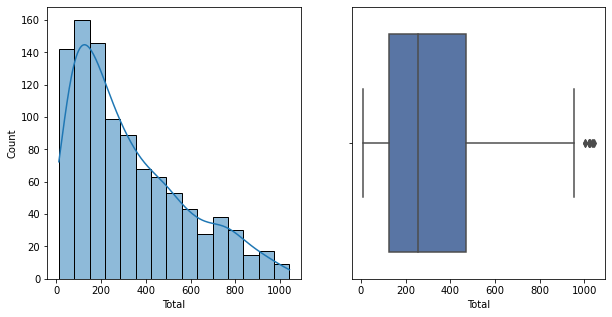

Time
 
Skewness : 0.025787149661161485


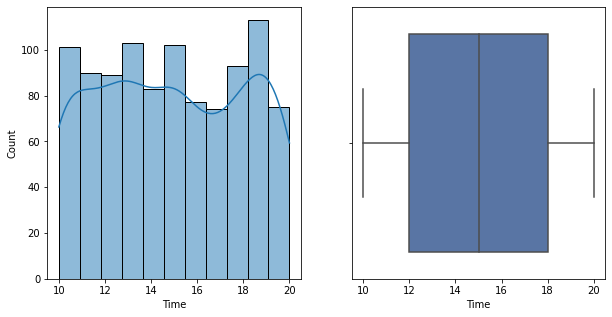

cogs
 
Skewness : 0.8925698049581418


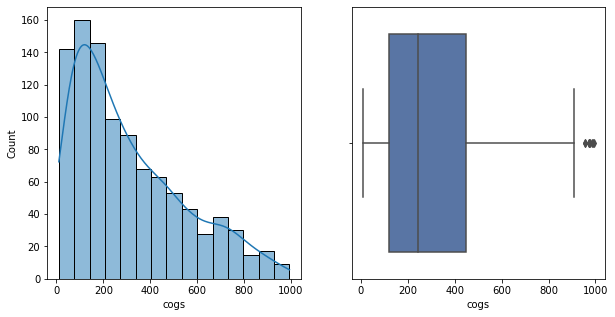

gross income
 
Skewness : 0.8925698049581423


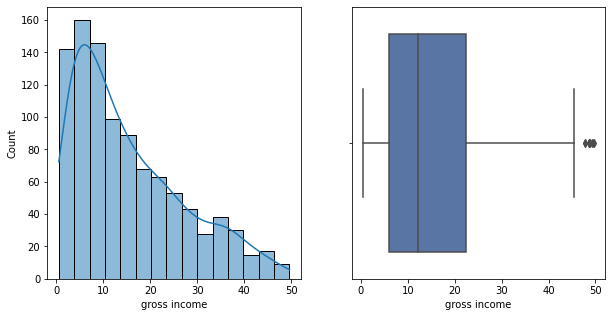

Rating
 
Skewness : 0.00900964876573073


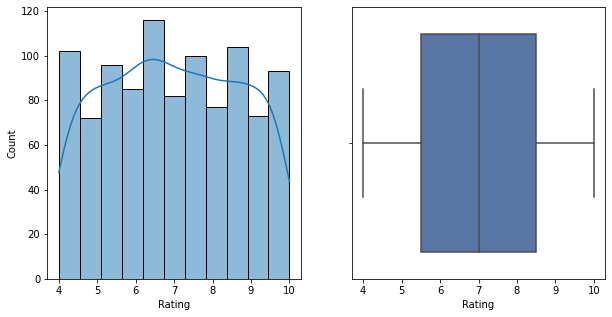

In [16]:
#Note -  By using the below syntax we can acheive the sknewness in boxplot and histogram plots
#        here histograms for check the distribution of each numerical column.


for i in Quantitative_data:
    print(i)
    print(' ')
    print('Skewness :',df[i].skew())
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[i],kde=True,palette='deep')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i],palette='deep')
    
    plt.show()

. Through plots and .skew() function we can get meaningfull information about our distribution behaviour.

. so coming to the point, Unit price, Quantity and rating columns are having the normal distribution
however Totals(sales), cogs, gross income are having right skew distribution with few outlier
observations.


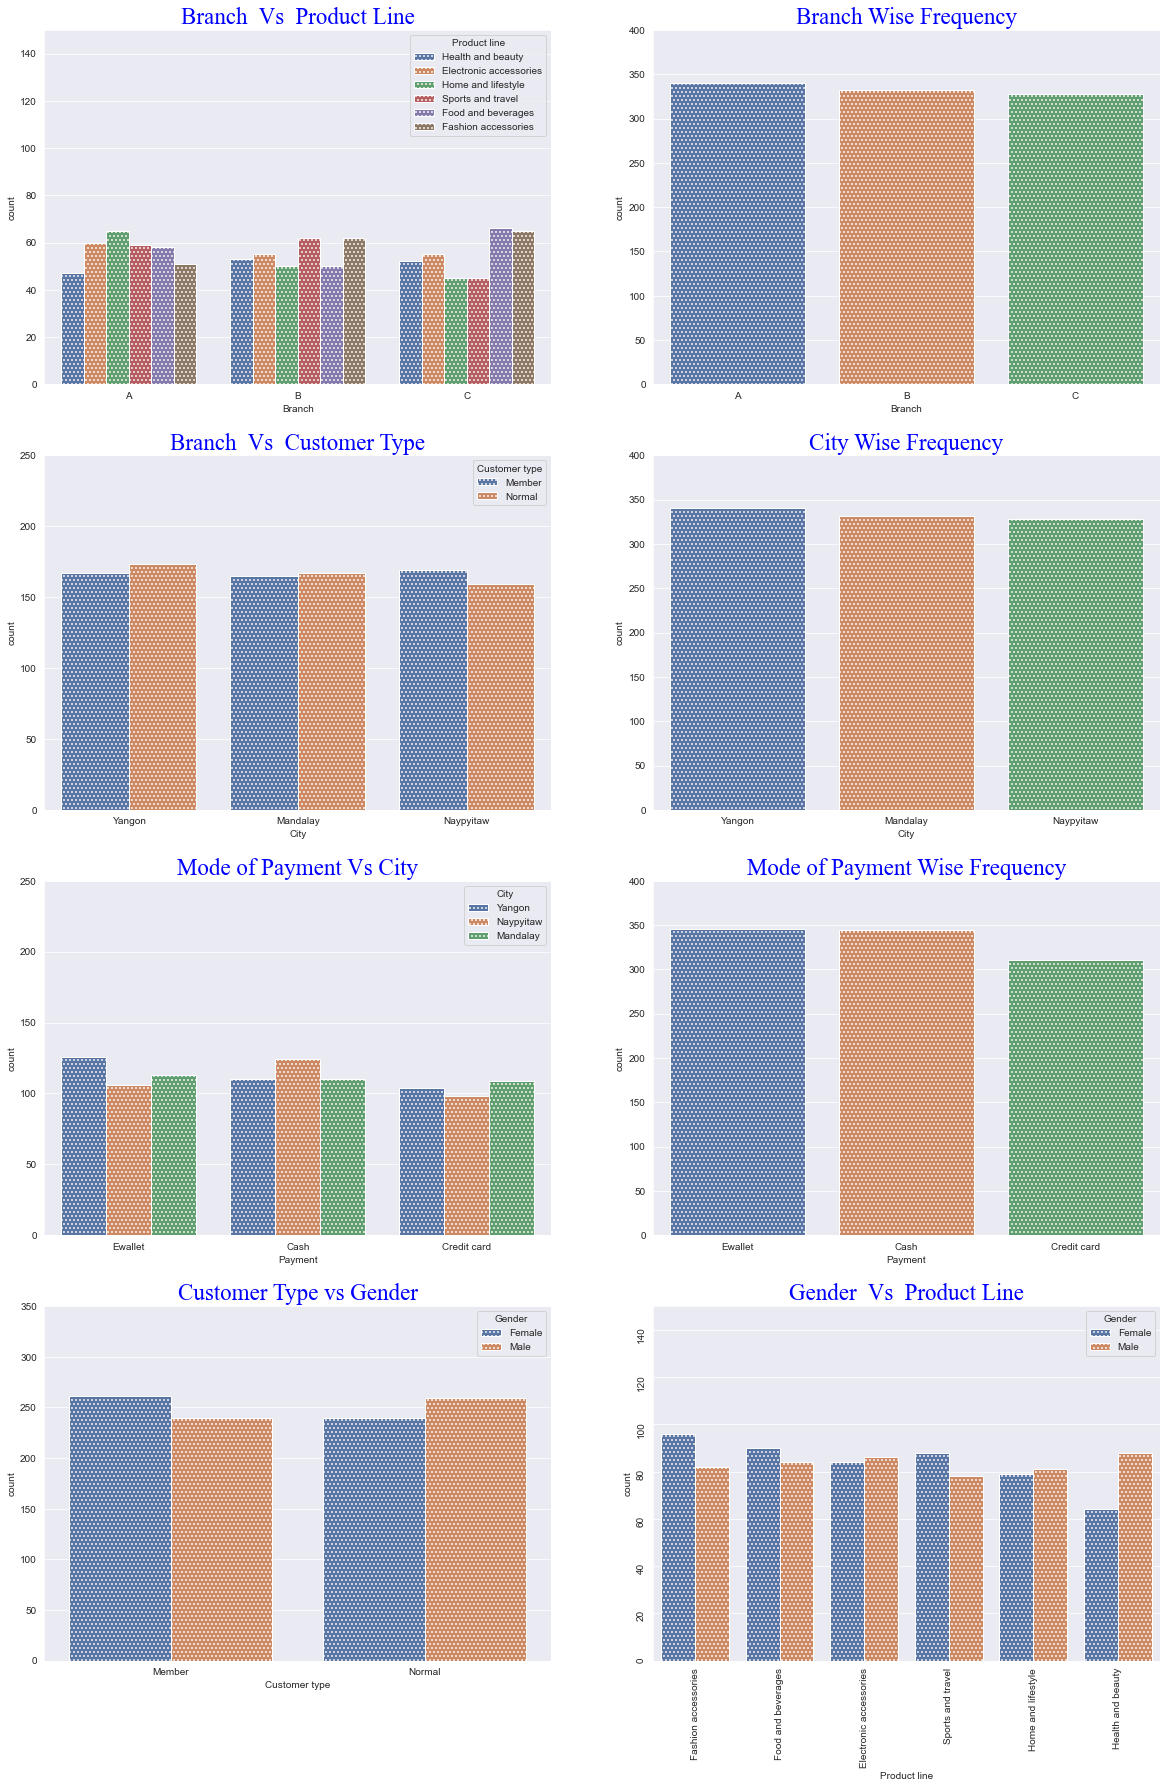

In [17]:
#Note -  With below Syntax, we can do univariate analysis between categorical variables. that is we can get Frequency
#        by using "count plots..."

sns.set_style('darkgrid')

title = {'family':'times new roman','color':'blue','size':23}

fig,axes=plt.subplots(4,2,figsize=(20,30))

axes[0,0].set_title('Branch  Vs  Product Line',fontdict=title)
sns.countplot(ax=axes[0,0],x=df.Branch,hue=df['Product line'],palette='deep',hatch='...',order=df.Branch.value_counts().index)
axes[0,0].set_ylim(0,150)

axes[0,1].set_title('Branch Wise Frequency',fontdict=title)
sns.countplot(ax=axes[0,1],x=df.Branch,palette='deep',hatch='...',order=df.Branch.value_counts().index)
axes[0,1].set_ylim(0,400)

axes[1,0].set_title('Branch  Vs  Customer Type',fontdict=title)
sns.countplot(ax=axes[1,0],x=df.City,hue=df['Customer type'],palette='deep',hatch='...',order=df.City.value_counts().index)
axes[1,0].set_ylim(0,250)

axes[1,1].set_title('City Wise Frequency',fontdict=title)
sns.countplot(ax=axes[1,1],x=df.City,palette='deep',hatch='...',order=df.City.value_counts().index)
axes[1,1].set_ylim(0,400)

axes[2,0].set_title('Mode of Payment Vs City',fontdict=title)
sns.countplot(ax=axes[2,0],x=df.Payment,hue=df.City,palette='deep',hatch='...',order=df.Payment.value_counts().index)
axes[2,0].set_ylim(0,250)

axes[2,1].set_title('Mode of Payment Wise Frequency',fontdict=title)
sns.countplot(ax=axes[2,1],x=df['Payment'],palette='deep',hatch='...',order=df['Payment'].value_counts().index)
axes[2,1].set_ylim(0,400)

axes[3,0].set_title('Customer Type vs Gender',fontdict=title)
sns.countplot(ax=axes[3,0],x=df['Customer type'],hue=df.Gender,palette='deep',hatch='...',order=df['Customer type'].value_counts().index)
axes[3,0].set_ylim(0,350)

axes[3,1].set_title('Gender  Vs  Product Line',fontdict=title)
sns.countplot(ax=axes[3,1],x=df['Product line'],hue=df.Gender,palette='deep',hatch='...',order=df['Product line'].value_counts().index)
axes[3,1].set_ylim(0,150)
axes[3,1].tick_params(labelrotation=90)

#plt.subplots_adjust(hspace=0.5)

plt.show()

### From the count plot, we can have below observations - 

1. (Branch vs Product Line) 

Through counts plots we could get the branch wise which product goining out from Mall. frequently(Higher). that is From 

 A branch - Home and lifestyle 65 times.
 
 B branch - Fashion accessories & sports and travel both 62 times.
 
 C branch - Food and Beverages 66 times || Fashion accessories 65 times.
 
  #### _______
  
   
2. (Branch vs Customer Type)

Customer with membership (173)  >  Normal customers in Yangon City

as well as, Naypyitaw city recorded 169 memebers  >  Normal customers

#### _______

3. (Mode of payment vs city)

. From Mandalay city, Credit Card users are more then remain payment modes.

. From Yangon city, Ewallet users are more than remain payment modes.

. From Naypyitaw city, cash users are more than remain payment modes.

#### _______

4. (Gender vs Product)

. Females are frequently purchasing fashion and accessories products.

. male are frequently purchasing health and beauty products And so on....

## EDA Bivariate Analysis

#### Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

#### For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

#### A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

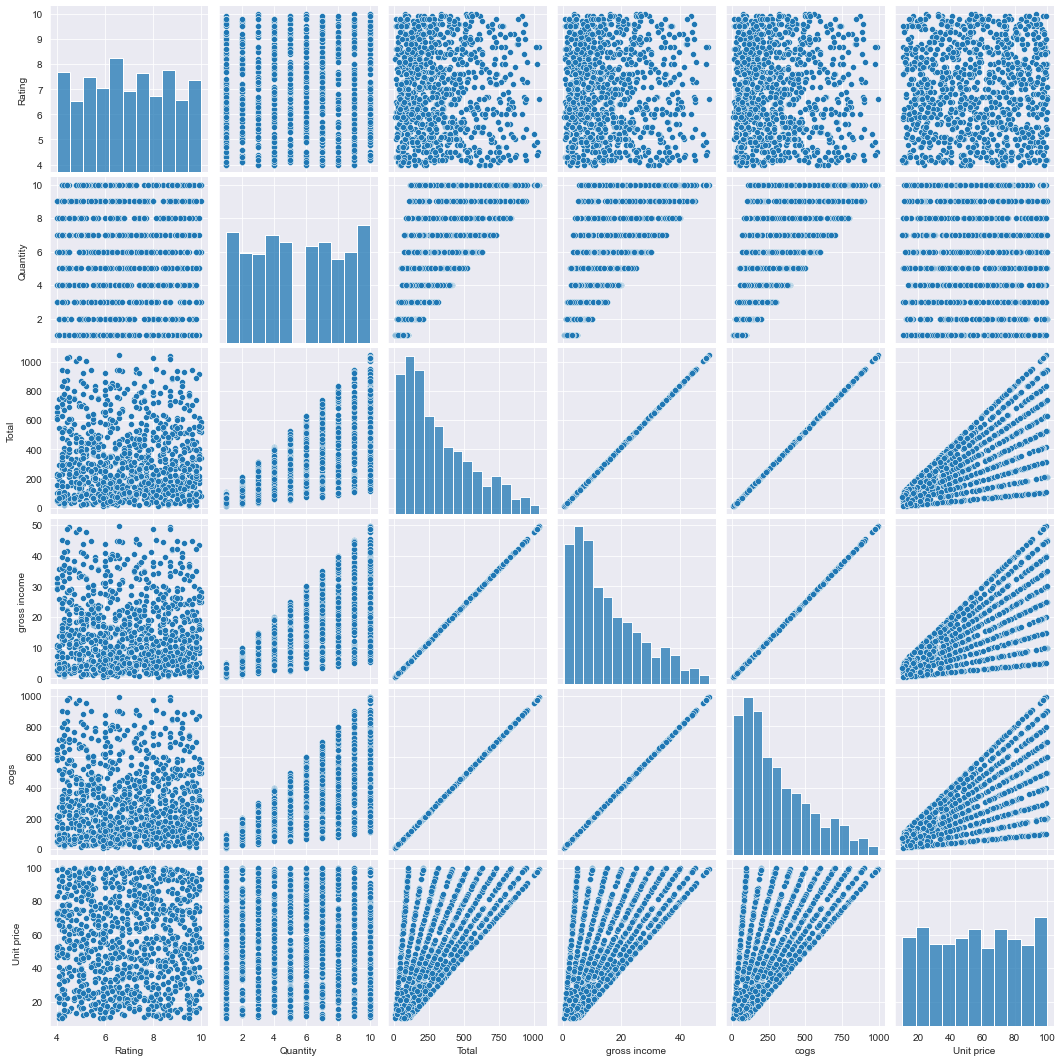

In [18]:
sns.pairplot(df,vars=['Rating','Quantity','Total','gross income','cogs','Unit price']);

#### Pair Plot provides below insights:

1. Here we can see a strong positive correlation between totals and gross income || cogs and gross income.
2. And we can see there is no relation between rating and quantity( While Increasing)

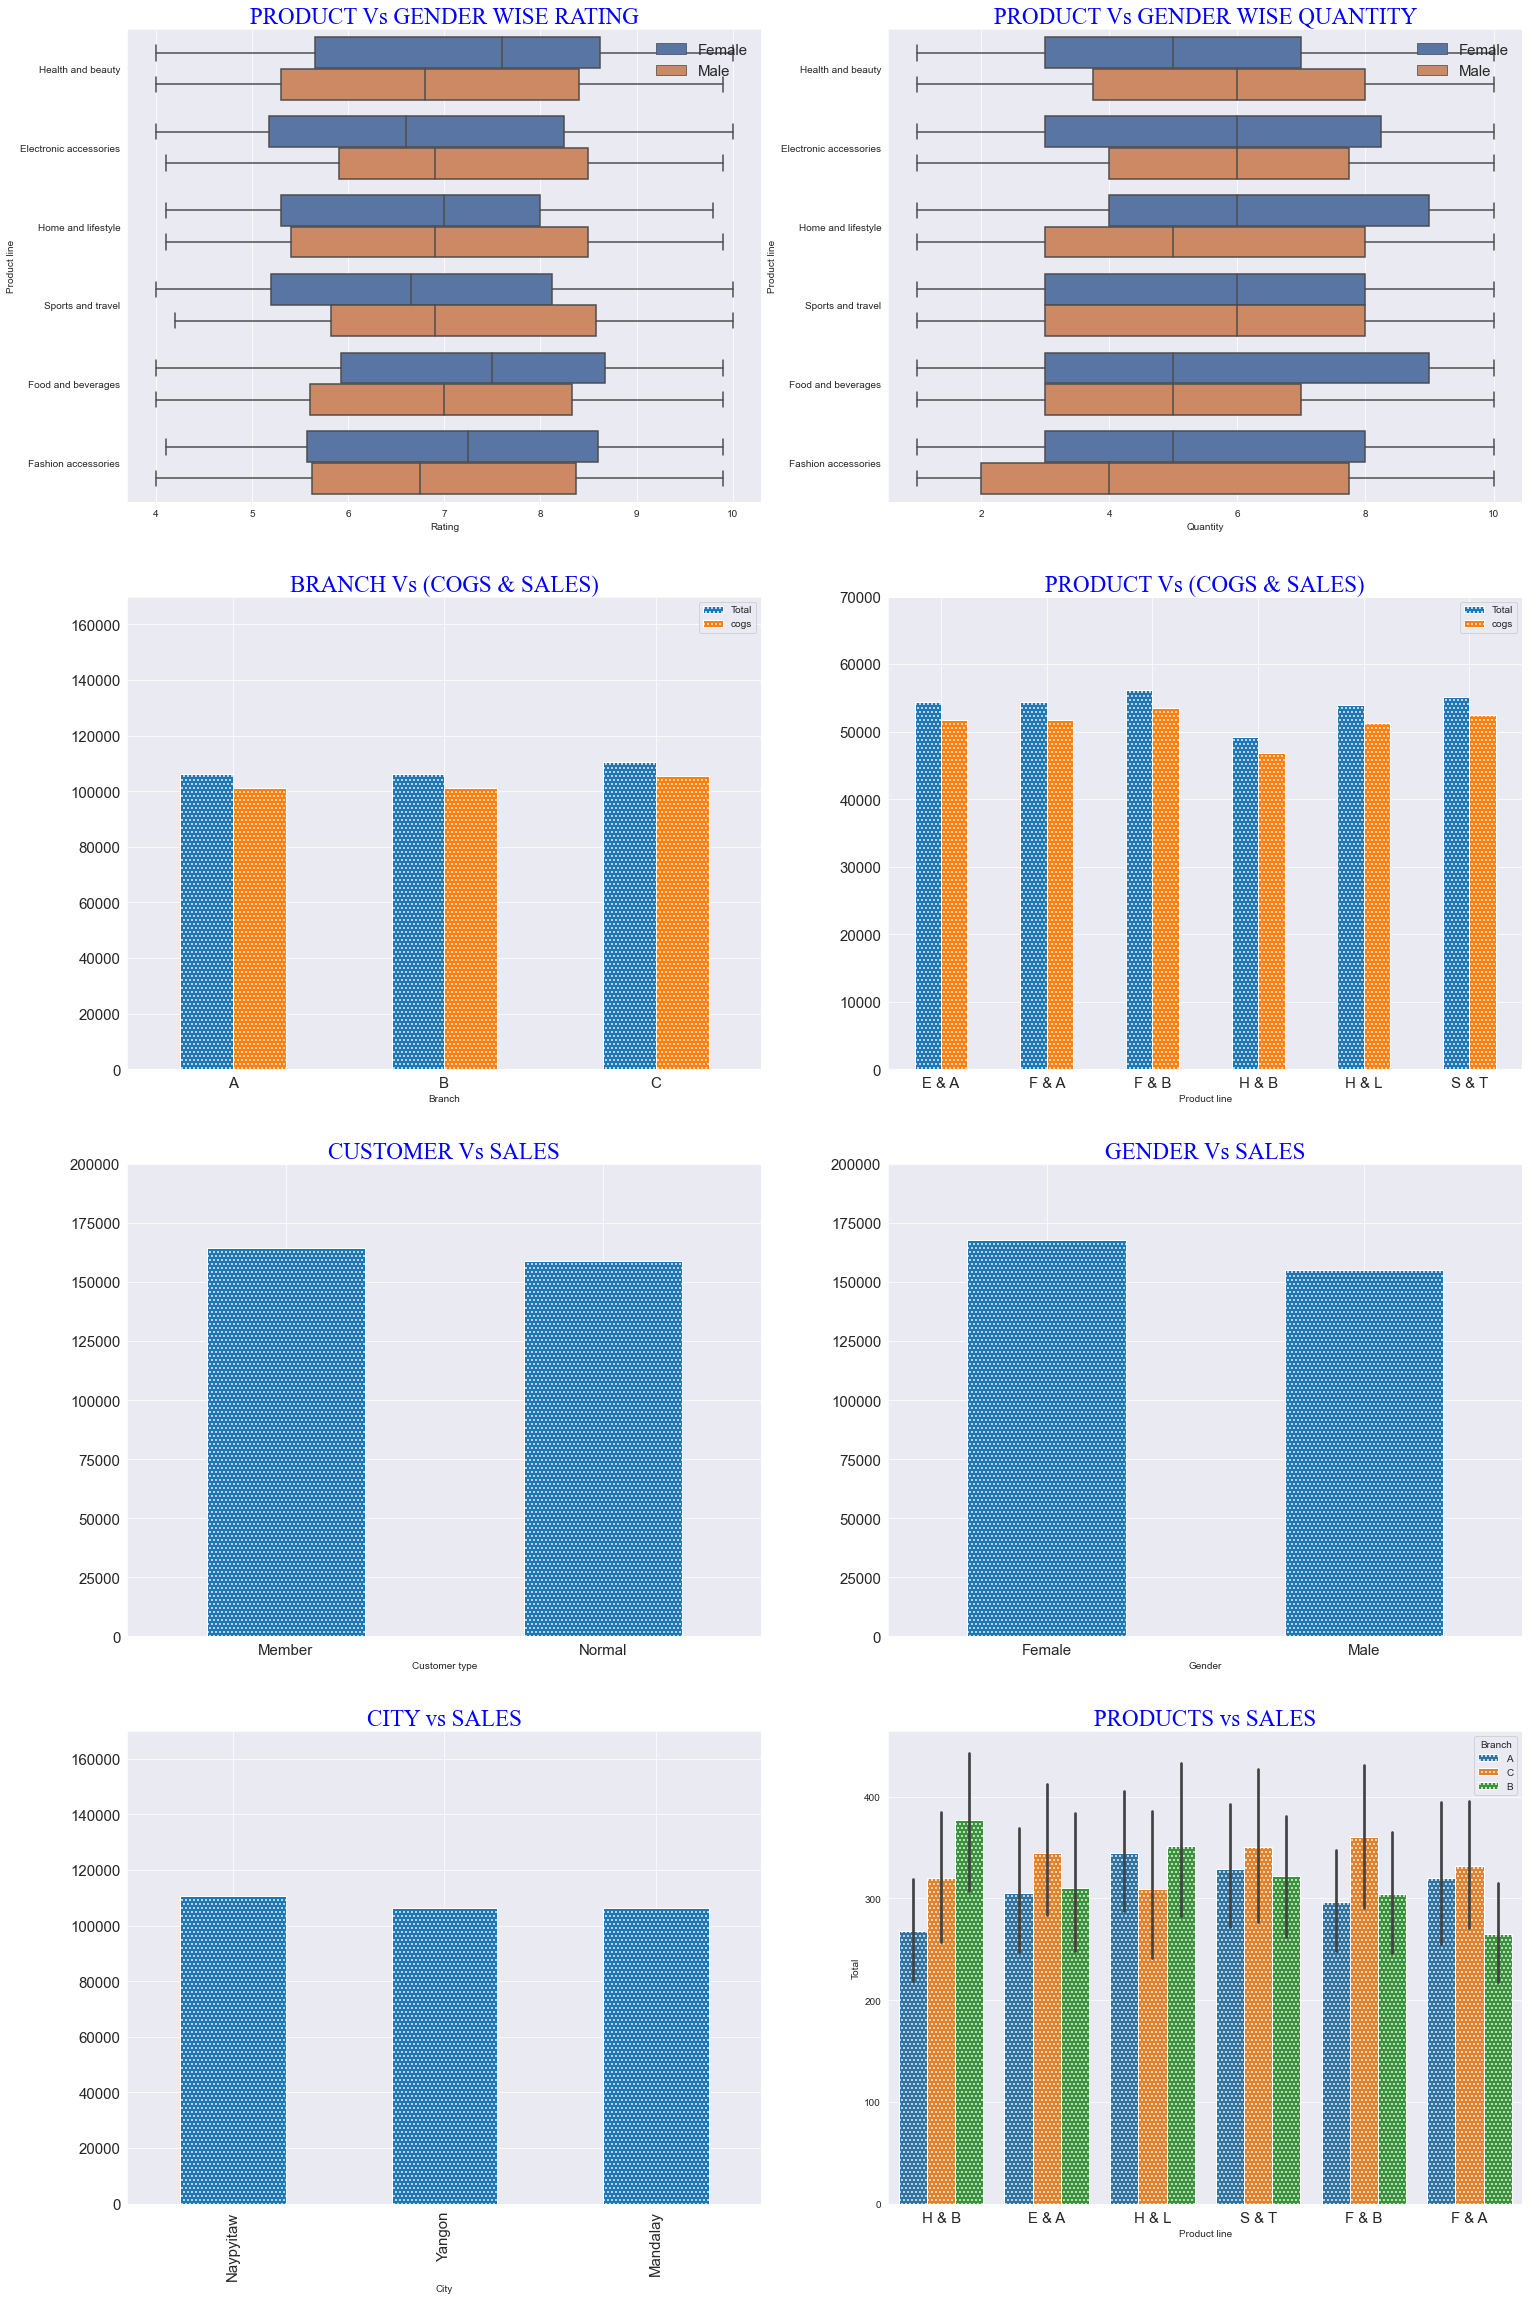

In [19]:
#Note - A bar plot can be used to show the relationship between Categorical variables and continuous variables 


fig,axes=plt.subplots(4,2,figsize=(25,40))

title = {'family':'times new roman','color':'blue','size':23}

axes[0,0].set_title('PRODUCT Vs GENDER WISE RATING',fontdict=title)
sns.boxplot(ax=axes[0,0],y=df['Product line'],x=df.Rating,palette='deep',hue=df.Gender)
axes[0,0].legend(loc=1,prop={'size':15},framealpha=False)

axes[0,1].set_title('PRODUCT Vs GENDER WISE QUANTITY',fontdict=title)
sns.boxplot(ax=axes[0,1],y=df['Product line'],x=df['Quantity'],palette='deep',hue=df.Gender)
axes[0,1].legend(loc=1,prop={'size':15},framealpha=False)

axes[1,0].set_title('BRANCH Vs (COGS & SALES)',fontdict=title)
df.groupby('Branch')[['Total','cogs']].sum().plot.bar(ax=axes[1,0],hatch='...',fontsize=15)  
axes[1,0].set_ylim(0,170000)

axes[2,0].set_title('CUSTOMER Vs SALES',fontdict=title)
df.groupby('Customer type')['Total'].sum().sort_values(ascending=False).plot.bar(ax=axes[2,0],hatch='...',fontsize=15)
axes[2,0].set_ylim(0,200000)


axes[2,1].set_title('GENDER Vs SALES',fontdict=title)
df.groupby('Gender')['Total'].sum().sort_values(ascending=False).plot.bar(ax=axes[2,1],hatch='...',fontsize=15)
axes[2,1].set_ylim(0,200000)
    
axes[1,1].set_title('PRODUCT Vs (COGS & SALES)',fontdict=title)
df.groupby('Product line')[['Total','cogs']].sum().plot.bar(ax=axes[1,1],hatch='...',fontsize=15)
axes[1,1].set_xticks([0,1,2,3,4,5],['E & A','F & A','F & B','H & B','H & L','S & T'])
axes[1,1].set_ylim(0,70000)

axes[3,0].set_title('CITY vs SALES',fontdict=title)
df.groupby('City')['Total'].sum().sort_values(ascending=False).plot.bar(ax=axes[3,0],hatch='...',fontsize=15)
axes[3,0].set_ylim(0,170000)

axes[3,1].set_title('PRODUCTS vs SALES',fontdict=title)
sns.barplot(x=df['Product line'],y=df['Total'],hue=df['Branch'],ax=axes[3,1],hatch='...')
axes[3,1].set_xticks([0,1,2,3,4,5],['H & B', 'E & A',
       'H & L', 'S & T', 'F & B',
       'F & A'],fontsize = 15)
                
axes[1,0].tick_params(labelrotation=0)
axes[0,1].tick_params(labelrotation=0)
axes[1,1].tick_params(labelrotation=0)
axes[2,0].tick_params(labelrotation=0)
axes[2,1].tick_params(labelrotation=0);
                     

### Observations

1. (Product vs Gender's Rating)

by using box plots- 

.females and males both have given highest average rating to 
food and beverages product.

.indivdually females are giving highest average rating to health and beauty products.
lowest average rating to electronic accessories.

.males are giving highest average rating to food and behaverage products
and lowest avearge rating to fashion accessories.

 #### _______

2. (Product vs Sales)

comparing the all products, 
. Most of the higher sales from Food and Beverage products

. lowest sales from Health and Beauty products.

 #### _______

3. (Branch vs Sales)

. looks like all the branches are geeting same sale figure. however not much significant difference.
from C branch getting higher sales compared to remain sales.

 #### _______

4. (City Vs Sales)

. From Naypyitaw city, Getting more sales however not much significant difference between all cities.

 #### _______

5. (members_ship vs normal customers)

. The customers who has membership, getting more sales from them than normal customers. And so on...




## EDA Multivariate Analysis

#### As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

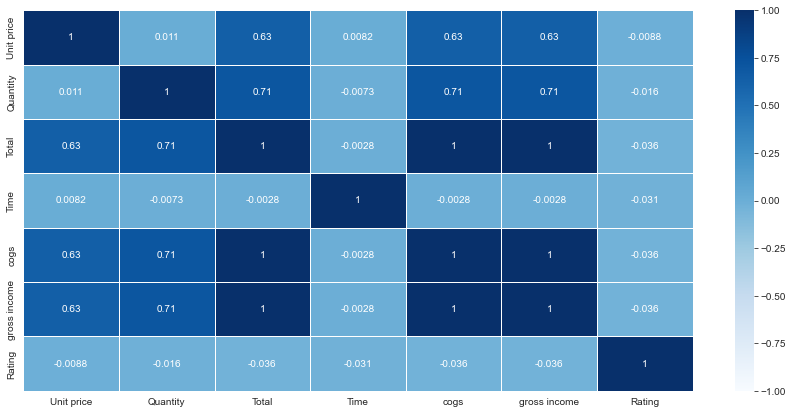

In [20]:
#   As the name suggests, Multivariate analysis looks at more than two variables. 
#   Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

plt.figure(figsize=(15,7))

sns.heatmap(df.corr(),linewidths=0.5,cmap='Blues',vmax=1,vmin=-1,annot=True);

### From the Heat map, we can infer the following:

1. Here It is appearing strong R(correlation cofficient) value is 0.63. Between units price and Totals

2. Positive Correlation R(correlation cofficient) value is 0.71. Between units Quantity and Totals.

3. Negative Correlation R(correlation cofficient) value is -0.016. Between Quantity and Rating.

## Timeline Analysis


#### with the help of DateTime dtype in the data frame. there is a possibility to do the timeline analysis and forecasting. ie., Month and day, time-wise transactions.



In [21]:
#Adding New Columns Month name and Day name due to further month wise and day wise analysis

df['Month'] = pd.DatetimeIndex(df['Date']).month

df['Day'] = df['Date'].dt.day_name()

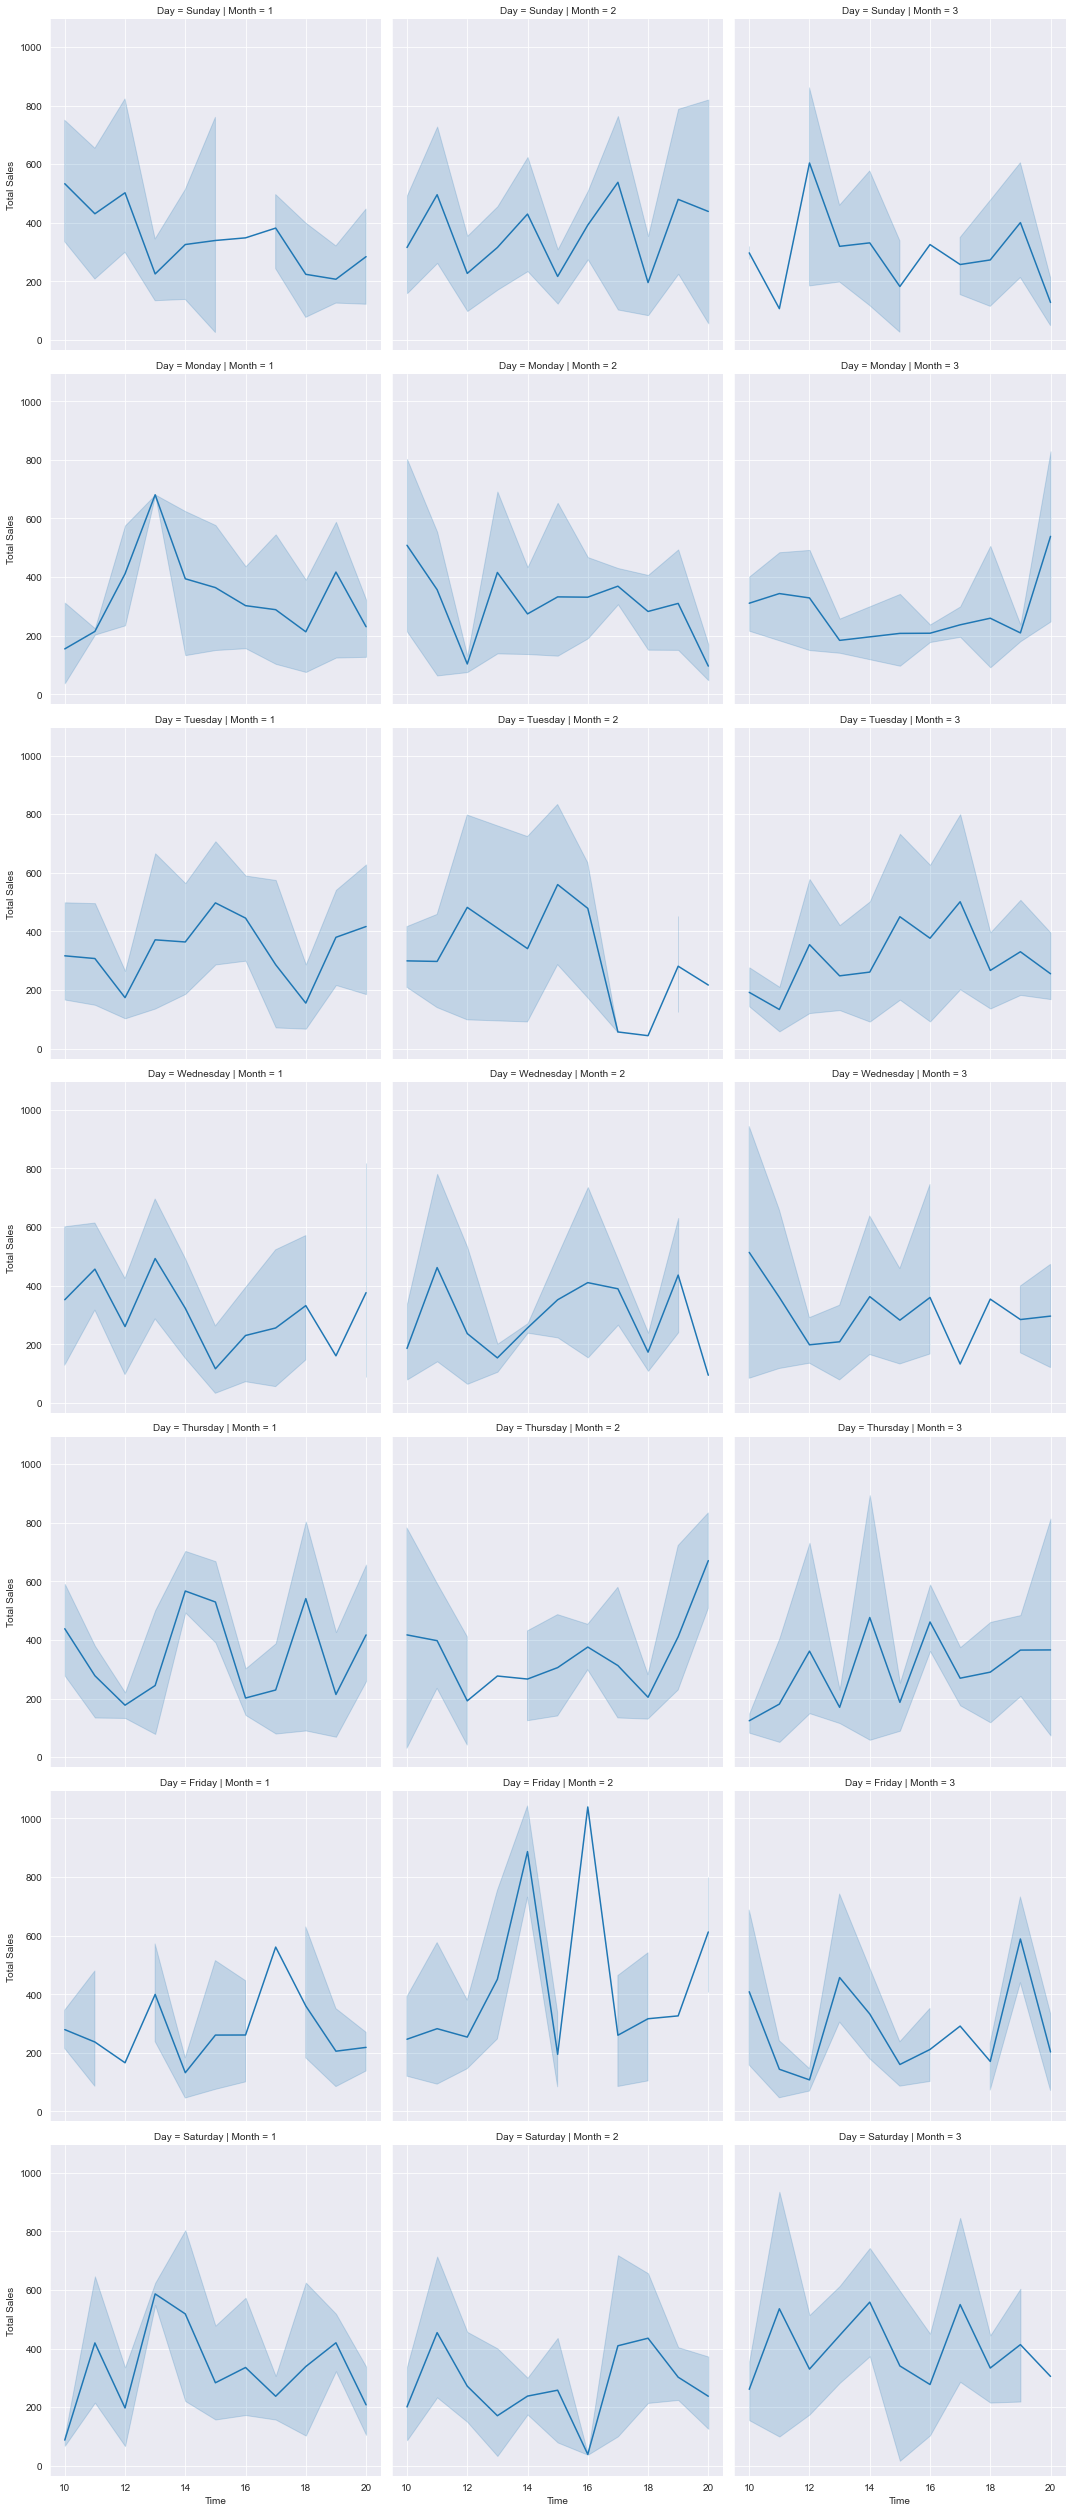

In [22]:
a=sns.relplot(x=df.Time,y=df.Total,kind='line',row=df.Day,col=df.Month,
              row_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],)

a.set_ylabels('Total Sales')

plt.show()  #below Darker shadow is confidence intervel(inference stats)



                                                    #Day wise Month sales

### Observations

. In month 1 Saturday sales were going well up to 600 total Sales.

. In month 2 Friday sales were going well up to 1000+ total Sales.

. In month 3 Friday sales were going well up to 600 total Sales

. In on average Friday in the week is going very well with less width of the confidence interval.

. another side on Wednesday is not going up to marks compare to Remain days in the week
and with the huge confidence interval 

. Here we can see in all charts the total sales figure raising in between 12noon to 2pm.

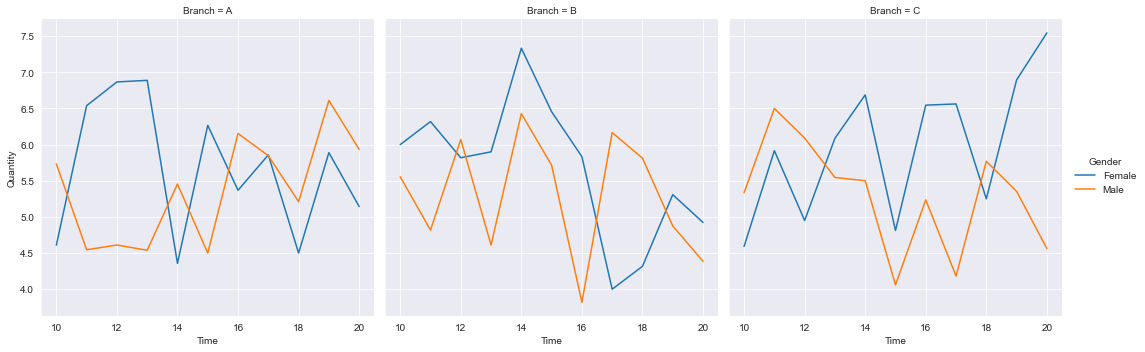

In [23]:
sns.relplot(x=df.Time,y=df.Quantity,hue=df['Gender'],col=df.Branch,kind='line',ci=None,col_order=['A','B','C'])

plt.show()

### Observations

#### Note :- FQ : female Quantity Curve, MQ : Male Quantity Curve



. At all branches, FQ-curves are going over the MQ-curve. Except for Branch A.  

. At branch C. It has a significant difference between A and B after 6 pm
FQ-curve increasing gradually to the top.

. At branch B. from Noon 12 to 3 pm FQ-Curve raising gradually.

. At branch A. after 3 pm MQ-curve is raising continuously.

. At Branch c. MQ-Curve is falling down for long time between 11 am to 3 pm.


In [24]:
time_series = df[['Date','Total']]

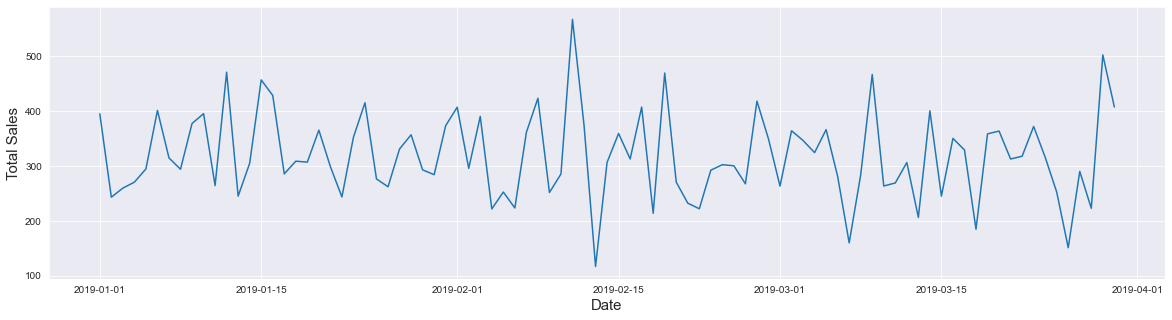

In [25]:
plt.figure(figsize=(20,5))

plot = sns.lineplot(x=time_series['Date'],y=time_series['Total'],ci=None);

plt.ylabel('Total Sales',fontsize=15)
plt.xlabel('Date',fontsize=15);


## Observation

. Sales look like no trend however it has variance and seasonality. But It is just
3 months of Sales. We can not say much more about behavior of the Sales

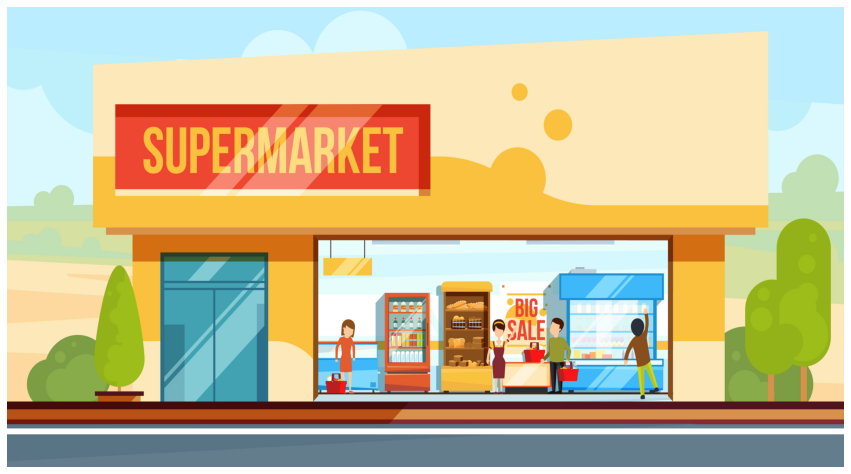

In [26]:
from PIL import Image

from urllib.request import urlretrieve

urlretrieve('https://securecdn.pymnts.com/wp-content/uploads/2017/05/grocery-tracker-51517.jpg','sm.jgp')

sm_image = Image.open('sm.jgp')
plt.figure(figsize=(15,10))
plt.grid(False)
plt.axis(False)
plt.imshow(sm_image);

# Conclusion

1. if you see here most of the sale transactions have been coming from females.so that Electronic accessories products are not getting more sale transactions.


2. Here The Strange point is Even though getting sales from females but getting fewer sales from Health and Beauty products. However Males-wise the highest product sold is Health and Beauty Product.



3. Coming to the mode of payment Credit Card sales are very less compared to other modes.


4. At Branch A, Home and lifestyle products are highest sold products


5. At Branch B, Health and Beauty products are highest sold products


6. At Branch C, Food and beverage products are highest sold products


7. Food and beverage sales are going very well at Branch c, Because compare to other topmost sold product of each Branch. you can understand It has a significant trend between 6 pm and 8 pm by females 


8. During 2019-02 month we can see in overall sales-wise it has the huge Downfall. 


#### This way, we perform EDA on the datasets to explore the data and extract all possible insights, which can help in model building and better decision making.

#### However, this was only an overview of how EDA works; you can go deeper into it and attempt the stages on larger datasets.

#### If the EDA process is clear and precise, our model will work better and gives higher accuracy!